Embedding - Tokens are transformed into numerical vectors. For example, "Alice" becomes a vector like [-0.342, 1.547, 0.234, -1.876, 0.765].

In [13]:
# Tokenization using Hugging Face's Transformers
%pip install transformers hf_xet --quiet
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
tokens = tokenizer.tokenize("a young girl named Alice sits bored by a riverbank...")
print(f'tokens: {tokens}')


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
tokens: ['a', 'Ġyoung', 'Ġgirl', 'Ġnamed', 'ĠAlice', 'Ġsits', 'Ġbored', 'Ġby', 'Ġa', 'Ġriver', 'bank', '...']


In [15]:
# Embedding and Processing with a Transformer Model
from transformers import AutoModel
model = AutoModel.from_pretrained("openai-community/gpt2")
inputs = tokenizer("A young girl named Alice sits bored by a riverbank...", return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

print(last_hidden_states)

tensor([[[-0.1422, -0.0903, -0.2047,  ..., -0.1065, -0.0782,  0.0224],
         [ 0.1639, -0.0167, -0.4816,  ...,  0.3005,  0.2550, -0.1709],
         [ 0.2465,  0.3846, -0.2994,  ...,  0.3477, -0.1493, -0.0842],
         ...,
         [-0.1187,  0.3841, -2.6101,  ..., -0.0946, -0.1120, -0.3397],
         [-0.5066,  0.1533, -2.3928,  ..., -0.0253, -0.0935, -0.3058],
         [-0.1265, -0.6703, -0.8038,  ...,  0.1576, -0.1944, -0.2277]]],
       grad_fn=<ViewBackward0>)


    Self-Attention - The model calculates attention scores for each token, understanding their importance in context.
    Layered Processing - Multiple neural network layers process these embeddings, enhancing understanding at each step.
    Encoders and Decoders - The encoder processes input text into embeddings, and the decoder generates output text, using strategies like Greedy Decoding or Beam Search.

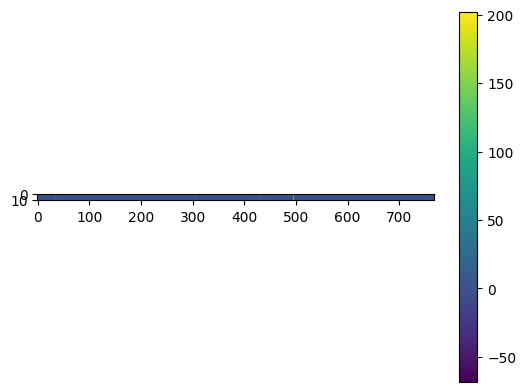

In [16]:
# Visualization of Embeddings (Simplified Example)
import matplotlib.pyplot as plt
plt.imshow(last_hidden_states.detach().numpy()[0], cmap='viridis')
plt.colorbar()
plt.show()